In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/project/hrv_features_to_emotions.csv")

In [ ]:
df.head(2000)

,Happy,Sad,Anger,Neutral,raw data,length,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,...,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci
0,Moderate,VeryLow,VeryLow,VeryHigh,"[16.51, 16.496, 16.5, 16.492, 16.492, 16.494, ...",5000,652.137931,656.0,31.679128,18.973666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.342198
1,VeryLow,High,VeryHigh,VeryLow,"[16.51, 16.496, 16.5, 16.492, 16.492, 16.494, ...",5000,652.137931,656.0,31.679128,18.973666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.342198
2,Moderate,Moderate,Low,Moderate,"[11.273, 11.265, 11.274, 11.272, 11.269, 11.27...",5000,664.571429,660.0,37.731598,21.895374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.586668
3,Moderate,Moderate,VeryLow,Low,"[10.049, 10.065, 10.042, 10.008, 10.065, 10.07...",5000,712.153846,708.0,35.991123,24.761260,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.839571
4,VeryLow,VeryLow,High,VeryLow,"[9.8221, 9.8296, 9.8246, 9.8414, 9.8504, 9.820...",5000,688.857143,680.0,29.959156,23.081177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.699737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,VeryLow,VeryLow,VeryLow,VeryLow,"[-10.528, -10.521, -10.512, -10.515, -10.529, ...",5000,786.000000,788.0,56.438757,58.097370,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.939020
402,High,VeryLow,VeryLow,Moderate,"[-11.523, -11.55, -11.536, -11.539, -11.526, -...",5000,813.666667,804.0,59.092207,72.744939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.036636
403,Moderate,VeryLow,Low,VeryLow,"[9.4264, 9.5243, 9.5514, 9.5579, 9.5536, 9.547...",5000,818.608696,796.0,99.176496,73.092718,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.606627
404,VeryLow,Moderate,VeryHigh,Low,"[2.8138, 2.7954, 2.8551, 2.8162, 2.7974, 2.820...",5000,816.521739,852.0,139.176731,85.917508,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.375420


In [ ]:
print(df.columns)

Index(['Happy', 'Sad', 'Anger', 'Neutral', 'raw data', 'length', 'MEAN_RR',
       'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25',
       'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU',
       'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'sampen', 'higuci'],
      dtype='object')


In [ ]:
happy_df = df[[
       'Happy', 'MEAN_RR',
       'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25',
       'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU',
       'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'sampen', 'higuci'
]]

In [ ]:
happy_df.groupby('Happy').size()

,0
Happy,
High,27
Low,34
Moderate,42
VeryHigh,66
VeryLow,237


✅ Class weights: {0: np.float64(1.0), 1: np.float64(1.0), 2: np.float64(1.0), 3: np.float64(1.0), 4: np.float64(1.0)}
Epoch 1/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2226 - loss: 2.0021 - val_accuracy: 0.3165 - val_loss: 1.5575
Epoch 2/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3297 - loss: 1.5450 - val_accuracy: 0.4008 - val_loss: 1.4771
Epoch 3/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4257 - loss: 1.4057 - val_accuracy: 0.4473 - val_loss: 1.4093
Epoch 4/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4335 - loss: 1.3753 - val_accuracy: 0.4726 - val_loss: 1.3396
Epoch 5/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4815 - loss: 1.2874 - val_accuracy: 0.5274 - val_loss: 1.2640
Epoch 6/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4939 - loss: 1.2736 - val_accuracy: 0.5316 - val_loss: 1.2320
Epoch 7/100
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4759 - loss: 1.2535 - val_accuracy: 0.5274 - val_loss: 

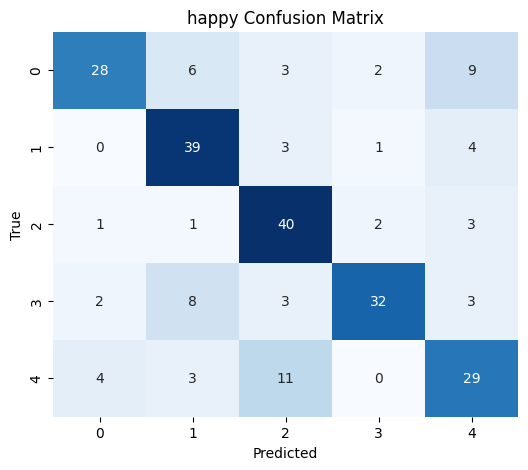

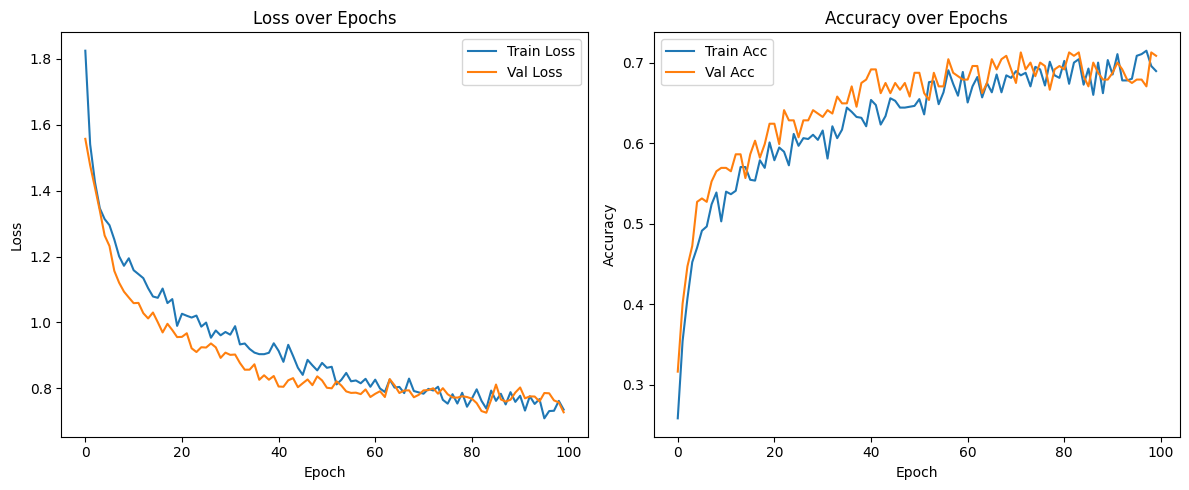

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import BatchNormalization

# === STEP 1: DEFINE happy_df ===
happy_df = df[[  # your base dataframe
       'Happy', 'MEAN_RR',
       'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR', 'pNN25',
       'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR',
       'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR',
       'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU',
       'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'sampen', 'higuci'
]].copy()

# === STEP 2: MAP 'Happy' LABELS TO INTS ===
happy_mapping = {'VeryLow': 0, 'Low': 1, 'Moderate': 2, 'High': 3, 'VeryHigh': 4}
happy_df['Happy Encoded'] = happy_df['Happy'].map(happy_mapping)

# Drop NaNs just in case (or alternatively you can fillna)
happy_df = happy_df.dropna()

# === STEP 3: EXTRACT FEATURES AND LABELS ===
feature_cols = happy_df.drop(columns=['Happy', 'Happy Encoded']).columns.tolist()
X = happy_df[feature_cols].values
y = happy_df['Happy Encoded'].values

# === STEP 4: BALANCE WITH SMOTE ===
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# === STEP 5: ONE-HOT ENCODE LABELS ===
encoder = OneHotEncoder(sparse_output=False, categories='auto')
y_resampled_onehot = encoder.fit_transform(y_resampled.reshape(-1, 1))

# === STEP 6: SPLIT ===
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled_onehot, test_size=0.2, random_state=42, stratify=y_resampled
)

# === STEP 7: SCALE ===
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# === STEP 8: COMPUTE CLASS WEIGHTS (even after SMOTE) ===
y_resampled_flat = np.argmax(y_resampled_onehot, axis=1)
class_weights = compute_class_weight('balanced', classes=np.unique(y_resampled_flat), y=y_resampled_flat)
class_weight_dict = dict(enumerate(class_weights))
print("✅ Class weights:", class_weight_dict)

# === STEP 9: BUILD MODEL ===
def build_model(input_dim, optimizer_choice='adam', learning_rate=0.001):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dense(5, activation='softmax')
])

    if optimizer_choice == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_choice == 'sgd':
        optimizer = SGD(learning_rate=learning_rate)
    elif optimizer_choice == 'rmsprop':
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        raise ValueError("Unsupported optimizer. Use 'adam', 'sgd', or 'rmsprop'.")

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

optimizer_choice = 'adam'
learning_rate = 0.001
model = build_model(X_train.shape[1], optimizer_choice, learning_rate)

# === STEP 10: TRAIN ===
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=16,
    class_weight=class_weight_dict,
    verbose=1
)

# === STEP 11: EVALUATE ===
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"✅ Final Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# === STEP 12: CLASSIFICATION REPORT ===
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("\n✅ Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

# === STEP 13: CONFUSION MATRIX PLOT ===
cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('happy Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# === STEP 14: TRAINING HISTORY PLOT ===
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('happy Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('happy Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model.save("happy_from_hrv_model.keras")
model.save("happy_from_hrv_model.h5")

import joblib

# Save
joblib.dump(scaler, 'happy_from_hrv_scaler.pkl')

from google.colab import files
files.download("happy_from_hrv_model.keras")
files.download("happy_from_hrv_model.h5")
files.download('happy_from_hrv_scaler.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>